In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import poisson
import pandas as pd
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rc('text', usetex=True)
np.set_printoptions(precision=4)
from scipy.integrate import odeint
from scipy.optimize import root

$\newcommand{\td}[2]{\frac{\mathrm{d}{ #1}}{\mathrm{d}{ #2}}}$
   \begin{align*}
        \td{F}{s} &= - \beta x \cos \alpha + \sin \alpha & \td{x}{s} &=\cos \alpha \\
        F \td{\alpha}{s} &= \beta x \sin \alpha + \cos \alpha & \td{y}{s} &= \sin \alpha.
    \end{align*}

In [2]:
y_f = 0.8
TS = 1e-6
def streljaj(arej, *args):
    """Sprejme [alfa0, F0] in args=(beta). 
    Vrne [x_final, y_final-y_f]."""
    if args:
        beta = args[0]
    else:
        beta = 1
    alfa0, F0 = arej
    x0 = 0
    y0 = 0
    INPUT = np.array([x0,y0,alfa0,F0])
    
    ND=1 #Čas opazovanja
    def diff_eqs(INP,t):
            '''The main set of equations'''
            Y=np.zeros(4)
            x,y,alfa,F = INP
            Y[0] = np.cos(alfa)
            Y[1] = np.sin(alfa)
            Y[2] = (beta * x * np.sin(alfa) + np.cos(alfa))/F
            Y[3] = -beta * x * np.cos(alfa) + np.sin(alfa)
            return Y   # For odeint
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    x_final = RES[-1,0]
    y_final = RES[-1,1]
    return [x_final, y_final-y_f]
def najdi_alfa_F(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0,1], args=(beta)).x
def streljaj_trajektorija(arej, *args):
    """Sprejme [alfa0, F0] in args=(beta). 
    Vrne obliko [xi, yi]."""
    if args:
        beta = args[0]
    else:
        beta = 1
    alfa0, F0 = arej
    x0 = 0
    y0 = 0
    INPUT = np.array([x0,y0,alfa0,F0])
    
    ND=1 #Čas opazovanja
    def diff_eqs(INP,t):
            '''The main set of equations'''
            Y=np.zeros(4)
            x,y,alfa,F = INP
            Y[0] = np.cos(alfa)
            Y[1] = np.sin(alfa)
            Y[2] = (beta * x * np.sin(alfa) + np.cos(alfa))/F
            Y[3] = -beta * x * np.cos(alfa) + np.sin(alfa)
            return Y   # For odeint
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    xi = RES[:,0]
    yi = RES[:,1]
    return [xi, yi]
for beta in [0.1,1,10,100,1000]:
    alfa0, F0 = najdi_alfa_F(streljaj, beta)
    xi, yi = streljaj_trajektorija([alfa0, F0],beta)
    plt.plot(xi, -yi, label=fr"$\beta={beta}$")
plt.legend()
plt.show()

In [3]:
root(streljaj, [0.05,1], args=(1))

    fjac: array([[-1.0000e+00,  1.9058e-08],
       [-1.9058e-08, -1.0000e+00]])
     fun: array([ 1.4459e-07, -1.3245e-13])
 message: 'The solution converged.'
    nfev: 36
     qtf: array([-1.4459e-07,  1.2969e-13])
       r: array([143.4741,   0.4615,   1.9981])
  status: 1
 success: True
       x: array([ 1.5708, -0.9   ])

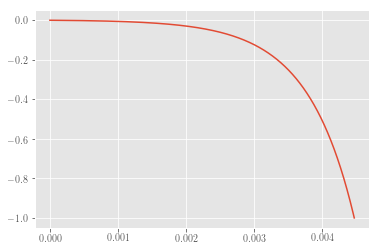

In [4]:
def najdi_alfa_F(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [1,1], args=(beta)).x
beta =0.01
xi, yi = streljaj_trajektorija(najdi_alfa_F(streljaj, beta),beta)
plt.plot(xi, -yi, label=fr"$\beta={beta}$")

## Kako $\beta$ vpliva na končno lokacijo? -- Ali lahko zarajdamo do $y_f$ tudi pri $\beta=0$? 

Število bet, ki dajo pravo rešitev s funkcijo najdi_alfa_F1: 126


/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


Število bet, ki dajo pravo rešitev s funkcijo najdi_alfa_F2: 210
Število bet, ki dajo pravo rešitev s funkcijo najdi_alfa_F3: 107
Število bet, ki dajo pravo rešitev s funkcijo najdi_alfa_F4: 362
Število bet, ki dajo pravo rešitev s funkcijo najdi_alfa_F5: 364
Število bet, ki dajo pravo rešitev s funkcijo najdi_alfa_F6: 392
Število bet, ki dajo pravo rešitev s funkcijo najdi_alfa_F7: 358
Število bet, ki dajo pravo rešitev s funkcijo najdi_alfa_F8: 353


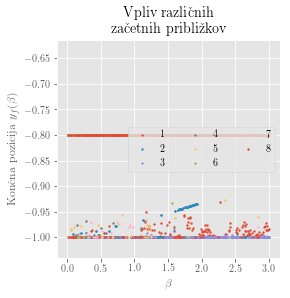

In [43]:
TS = 1e-3
y_f = 0.8

def streljaj_konec(arej, *args):
    """Sprejme [alfa0, F0] in args=(beta). 
    Vrne končno točko yf."""
    if args:
        beta = args[0]
    else:
        beta = 1
    alfa0, F0 = arej
    x0 = 0
    y0 = 0
    INPUT = np.array([x0,y0,alfa0,F0])
    
    ND=1 #Čas opazovanja
    def diff_eqs(INP,t):
            '''The main set of equations'''
            Y=np.zeros(4)
            x,y,alfa,F = INP
            Y[0] = np.cos(alfa)
            Y[1] = np.sin(alfa)
            Y[2] = (beta * x * np.sin(alfa) + np.cos(alfa))/F
            Y[3] = -beta * x * np.cos(alfa) + np.sin(alfa)
            return Y   # For odeint
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    yi = RES[-1,1]
    return yi

def najdi_alfa_F1(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [1,1], args=(beta)).x
def najdi_alfa_F2(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0,0], args=(beta)).x
def najdi_alfa_F3(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0.1*beta,beta], args=(beta)).x
def najdi_alfa_F4(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0.001*beta*beta,0.001*beta*beta], args=(beta)).x
def najdi_alfa_F5(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0.01*beta*beta,0.001*beta*beta], args=(beta)).x
def najdi_alfa_F6(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0.001*beta*beta,0.01*beta*beta], args=(beta)).x
def najdi_alfa_F7(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0.001*beta*beta*beta,0.001*beta*beta*beta], args=(beta)).x
def najdi_alfa_F8(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0.0001*beta*beta,0.0001*beta*beta], args=(beta)).x
funkcije = [najdi_alfa_F1,najdi_alfa_F2,najdi_alfa_F3, najdi_alfa_F4,
           najdi_alfa_F5,najdi_alfa_F6,najdi_alfa_F7, najdi_alfa_F8]
razpon_bet = np.linspace(3,0.01,400, endpoint=True)
slovar = {"razpon":razpon_bet}
plt.figure(figsize=(4,4))
for najdi_alfa_F in funkcije:
    yfi = np.empty_like(razpon_bet)
    for i,beta in enumerate(razpon_bet):
        TS = 1e-3
        alfa0, F0 = najdi_alfa_F(streljaj, beta)
        TS = 1e-4
        yfi[i] = streljaj_konec([alfa0, F0], beta)
    slovar[najdi_alfa_F] = yfi
    plt.scatter(razpon_bet, -yfi, label=f"{najdi_alfa_F.__name__[-1]}",s=3)
    print(f"Število bet, ki dajo pravo rešitev s funkcijo {najdi_alfa_F.__name__}:", np.sum(np.isclose(yfi,y_f)))

plt.xlabel(r"$\beta$")
plt.ylabel(r"Končna pozicija $y_f (\beta)$")
plt.title("Vpliv različnih\nzačetnih približkov")
plt.ylim(-y_f*1.3, -y_f/1.3)
plt.legend(loc=7, ncol=3)
plt.savefig("1-2-vpliv-bete-razlicni-priblizki.pdf", bbox_inches='tight')
plt.show()

In [49]:
for f in funkcije:
    slovar[f"{f.__name__[-1]}"] = slovar[f]
slovar = {"razpon":slovar["razpon"],
         '1':slovar["1"],
          '2':slovar["2"],
          '3':slovar["3"],
          '4':slovar["4"], 
          '5': slovar["5"], 
          '6': slovar["6"], 
          '7': slovar["7"], 
          '8': slovar["8"]}


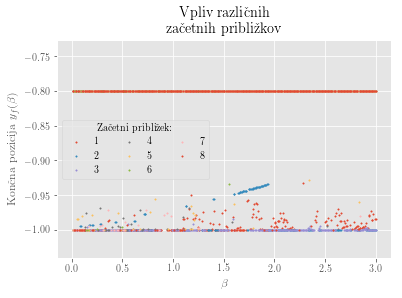

In [60]:
for i in range(1,9):
    plt.scatter(slovar["razpon"], -slovar[f"{i}"], label=i, s=2)

plt.xlabel(r"$\beta$")
plt.ylabel(r"Končna pozicija $y_f (\beta)$")
plt.title("Vpliv različnih\nzačetnih približkov")
plt.ylim(-y_f*1.3, -y_f/1.1)
plt.legend(loc="center left", ncol=3, title="Začetni približek:")
plt.savefig("1-2-vpliv-bete-razlicni-priblizki.pdf", bbox_inches='tight')
plt.show()

## Maksimalni odmiki

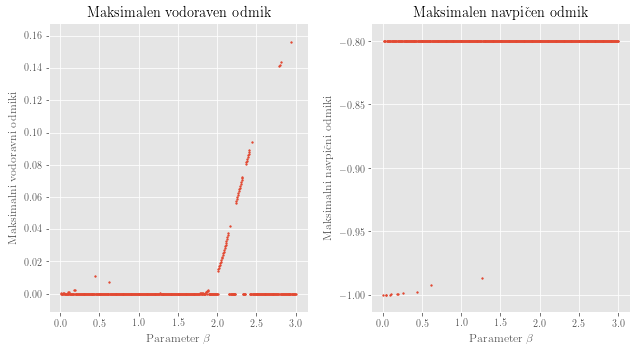

In [71]:
y_f = 0.8
TS = 1e-4
def streljaj(arej, *args):
    """Sprejme [alfa0, F0] in args=(beta). 
    Vrne [x_final, y_final-y_f]."""
    if args:
        beta = args[0]
    else:
        beta = 1
    alfa0, F0 = arej
    x0 = 0
    y0 = 0
    INPUT = np.array([x0,y0,alfa0,F0])
    
    ND=1 #Čas opazovanja
    def diff_eqs(INP,t):
            '''The main set of equations'''
            Y=np.zeros(4)
            x,y,alfa,F = INP
            Y[0] = np.cos(alfa)
            Y[1] = np.sin(alfa)
            Y[2] = (beta * x * np.sin(alfa) + np.cos(alfa))/F
            Y[3] = -beta * x * np.cos(alfa) + np.sin(alfa)
            return Y   # For odeint
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    x_final = RES[-1,0]
    y_final = RES[-1,1]
    return [x_final, y_final-y_f]
def najdi_alfa_F(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0.001*beta*beta,0.01*beta*beta], args=(beta)).x
def streljaj_odmiki(arej, *args):
    """Sprejme [alfa0, F0] in args=(beta). 
    Vrne [maksx, maksy]."""
    if args:
        beta = args[0]
    else:
        beta = 1
    alfa0, F0 = arej
    x0 = 0
    y0 = 0
    INPUT = np.array([x0,y0,alfa0,F0])
    
    ND=1 #Čas opazovanja
    def diff_eqs(INP,t):
            '''The main set of equations'''
            Y=np.zeros(4)
            x,y,alfa,F = INP
            Y[0] = np.cos(alfa)
            Y[1] = np.sin(alfa)
            Y[2] = (beta * x * np.sin(alfa) + np.cos(alfa))/F
            Y[3] = -beta * x * np.cos(alfa) + np.sin(alfa)
            return Y   # For odeint
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    xi = RES[:,0]
    yi = RES[:,1]
    return [np.max(xi), np.max(yi)]


razpon_bet = np.linspace(0.01, 3, 500)
odmiki = {"razpon":razpon_bet}
xi = np.empty_like(razpon_bet)
yi = np.empty_like(razpon_bet)
for i, beta in enumerate(razpon_bet):
    x,y = streljaj_odmiki(najdi_alfa_F(streljaj,beta), beta)
    xi[i] = x
    yi[i] = y
odmiki["x"] = xi
odmiki["y"] = yi

plt.figure(figsize=(9,5))
plt.subplot(121)
plt.title("Maksimalen vodoraven odmik")
plt.scatter(odmiki["razpon"], odmiki["x"],s=3)
plt.xlabel(r"Parameter $\beta$")
plt.ylabel("Maksimalni vodoravni odmiki")

plt.subplot(122)
plt.title("Maksimalen navpičen odmik")
plt.scatter(odmiki["razpon"], -odmiki["y"],s=3)
plt.xlabel(r"Parameter $\beta$")
plt.ylabel("Maksimalni navpični odmiki")

plt.tight_layout()
plt.show()

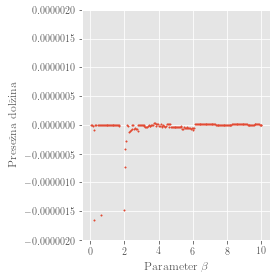

In [99]:
y_f = 0.8
TS = 1e-4
def streljaj(arej, *args):
    """Sprejme [alfa0, F0] in args=(beta). 
    Vrne [x_final, y_final-y_f]."""
    if args:
        beta = args[0]
    else:
        beta = 1
    alfa0, F0 = arej
    x0 = 0
    y0 = 0
    INPUT = np.array([x0,y0,alfa0,F0])
    
    ND=1 #Čas opazovanja
    def diff_eqs(INP,t):
            '''The main set of equations'''
            Y=np.zeros(4)
            x,y,alfa,F = INP
            Y[0] = np.cos(alfa)
            Y[1] = np.sin(alfa)
            Y[2] = (beta * x * np.sin(alfa) + np.cos(alfa))/F
            Y[3] = -beta * x * np.cos(alfa) + np.sin(alfa)
            return Y   # For odeint
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    x_final = RES[-1,0]
    y_final = RES[-1,1]
    return [x_final, y_final-y_f]
def najdi_alfa_F(streljaj, beta):
    """Vrne [alfa_0, F_0] za dano beta."""
    return root(streljaj, [0.001*beta*beta,0.01*beta*beta], args=(beta)).x
def streljaj_dolzina(arej, *args):
    """Sprejme [alfa0, F0] in args=(beta). 
    Vrne dolzino**2."""
    if args:
        beta = args[0]
    else:
        beta = 1
    alfa0, F0 = arej
    x0 = 0
    y0 = 0
    INPUT = np.array([x0,y0,alfa0,F0])
    
    ND=1 #Čas opazovanja
    def diff_eqs(INP,t):
            '''The main set of equations'''
            Y=np.zeros(4)
            x,y,alfa,F = INP
            Y[0] = np.cos(alfa)
            Y[1] = np.sin(alfa)
            Y[2] = (beta * x * np.sin(alfa) + np.cos(alfa))/F
            Y[3] = -beta * x * np.cos(alfa) + np.sin(alfa)
            return Y   # For odeint
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    xi = RES[:,0]
    yi = RES[:,1]
    return np.sum((np.diff(xi))**2 + (np.diff(yi))**2)/TS


#razpon_bet = np.linspace(0.01, 10, 200)
#s = np.empty_like(razpon_bet)
#for i, beta in enumerate(razpon_bet):
#    s[i] = streljaj_dolzina(najdi_alfa_F(streljaj, beta), beta)
plt.figure(figsize=(4,4))
plt.scatter(razpon_bet, s-1, s=2)
plt.xlabel(r"Parameter $\beta$")
plt.ylabel("Presežna dolžina")
eps=2e-6
plt.ylim((-eps, +eps))
plt.tight_layout()
plt.savefig("1-4-stabilnost_integracije.pdf", bbox_inches="tight")
plt.show()

In [83]:
s

array([9.9999e-05, 1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04,
       1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04,
       1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04,
       1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04, 1.0000e-04])

In [ ]:
np.diff()